# Colour-Magnitude Diagrams #

In this data project, you will work with catalogs of observed properties of stars in the local neighbourhood. You will work with observed parallaxes to determine distances to stars, and convert from apparent to absolute magnitudes. You will plot colour-magnitude diagrams, and compare the observed data with theoretical curves that predict the locations of stars in the CMD based on the age of the population. 

First, you will investigate stellar properties from the Hipparcos catalog. 

Next, you will use data from the Gaia telescope to identify stellar cluster members using a combination of observed parallax and proper motion. This notebook walks you through the steps for one open cluster, the Hyades. You will then complete the same steps for a second open cluster, as well as for a globular cluster. You will select one of each from the data available on the project page in Quercus. 

This notebook includes instructions on which plots to include in your final report, along with questions to answer. See the project instructions for the project rubric and additional instructions on the final report structure and content. 

In [2]:
# First, import the usual libraries to help you in your calculations and plots:
import numpy as np
import astropy.constants as c
import astropy.units as u
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_style('darkgrid')

# Section 1: the Hipparcos CMD for the local stellar neighbourhood

The Hipparcos data that you will be using are in the file 'hipparcos_parallax.dat'. Open the file in your favourite text editor to take a look at the columns. 

There are two header rows you will need to skip when reading in the data. The columns (listed in the header rows) are:
* p: parallax in milli-arcseconds
* sig_p: parallax uncertainty (same units)
* v: apparent V magnitude (magnitudes)
* bv: B-V color (magnitudes)
* sig_bv: B-V uncertainty (magnitudes)

Recall that we use different filters to observe stars and estimate their colour (which is related to their effective temperatures). With the Hipparchos data, you are looking at the stellar brightness in the V (visual) and B (blue) filters. 

In [3]:
# Read in the data using np.loadtxt. See previous assignments for syntax if needed. 

data = np.loadtxt('hipparcos_parallax.dat', skiprows=2)

# You will want separate arrays for each column! 
p = data[:, 0]
sig_p = data[:, 1]
v = data[:, 2]
bv = data[:, 3]
sig_bv = data[:, 4]


In [4]:
# show the first 5 rows of the data table they are correct
df = pd.DataFrame(data, columns=['p', 'sig_p', 'v', 'bv', 'sig_bv'])
df.head(10)

,p,sig_p,v,bv,sig_bv
0,11.95,0.63,7.83,0.412,0.003
1,15.94,0.82,8.69,0.608,0.016
2,17.08,0.60,7.50,0.473,0.015
3,11.33,0.79,8.73,0.627,0.015
4,12.81,0.67,8.10,0.689,0.015
5,12.49,0.73,8.28,0.502,0.011
6,16.40,0.70,7.81,0.483,0.010
7,12.52,0.77,8.27,0.477,0.012
8,25.55,0.52,6.46,0.429,0.005
9,17.94,0.94,9.19,0.750,0.022


Recall that a colour magnitude diagram (CMD) usually plots the absolute visual magnitude (V) against the colour. Right now you only have apparent magnitudes. This isn't a problem for colour; the B-V colour will remain the same if you calculate it using apparent or absolute magnitudes! 
As a first look at a CMD, we can plot the apparent visual vs. the B-V colour. The B-V colour is simply the difference in B and V magnitudes. 

Save this plot and include it in your report. 

In [5]:
# Using a scatter plot, plot the CMD of the Hipparchos data as apparent V magnitude vs. B-V colour. 
# Because there are so many stars, make the size of your plotted points smaller 
# (i.e., set s=5 or so in the plt.scatter command)
# Add axis labels. Remember that lower magnitudes are brighter - set your plot ranges accordingly! 

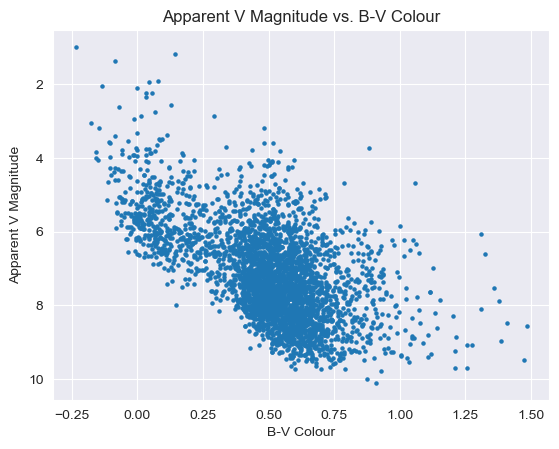

In [6]:
bv_colour = bv 
# Create a scatter plot
plt.Figure(figsize=(12, 12))
plt.scatter(bv_colour, v, s=5)

# Set the y-axis to be inverted (since lower magnitudes are brighter)
plt.gca().invert_yaxis()

# Add labels
plt.title('Apparent V Magnitude vs. B-V Colour')
plt.xlabel('B-V Colour')
plt.ylabel('Apparent V Magnitude')

# saving the figure
plt.savefig('Apparent(V)magnitude_VS_B-V color.png')

# Show the plot
plt.show()


Your CMD may not look like you expected - perhaps you don't see a clear trend suggestive of a main sequence? Let's see why that is. 

Next we will make a histogram of the parallax values in the dataset. 

In [7]:
# There is a very quick and easy function to plot histograms in matplotlib:
# plt.hist(data,bins='auto',range=(x1,x2))
# where data is the array you want use in your histogram, and x1 and x2 are lower and upper limits of the data.
# You can look up the documentation on plt.hist if you want to get more fancy. 
# You don't have to include the range parameter in the function. 
# Start without setting a range - see if this is needed. 
# You might see that many bins are pretty empty, and can limit the range to better see the distribution. 
# Make a histogram of the parallax values:

In [8]:

# create a function to convert parallax from mili-arcseconds to parsecs
def convert_to_parsecs(p):
    #convert from mili-arcseconds to arcseconds
    arcsec = p / 1000
    #convert from arcseconds to parsecs
    p_arcsec = 1 / arcsec

    return p_arcsec

# convert the parallax values to parsecs
p_arcsec = convert_to_parsecs(p)

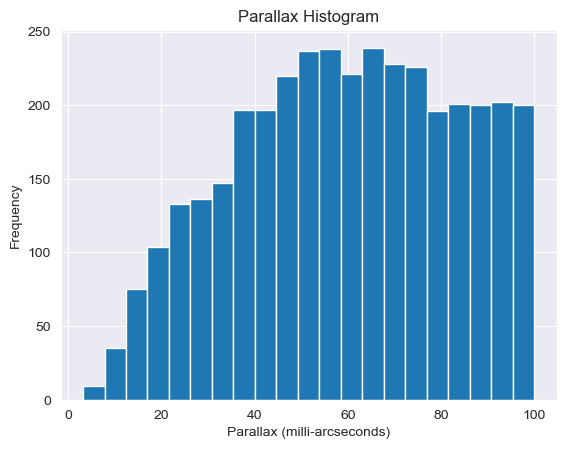

In [9]:
# Create a histogram of the parallax values
plt.hist(p_arcsec, bins='auto')

# Add labels
plt.title('Parallax Histogram')
plt.xlabel('Parallax (milli-arcseconds)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [10]:
# Getting the min and max values of the parallax data
print('Min parallax:', np.min(p_arcsec), 'mas')
print('Max parallax:', np.max(p_arcsec), 'mas')

Min parallax: 3.2175032175032174 mas
Max parallax: 99.9000999000999 mas


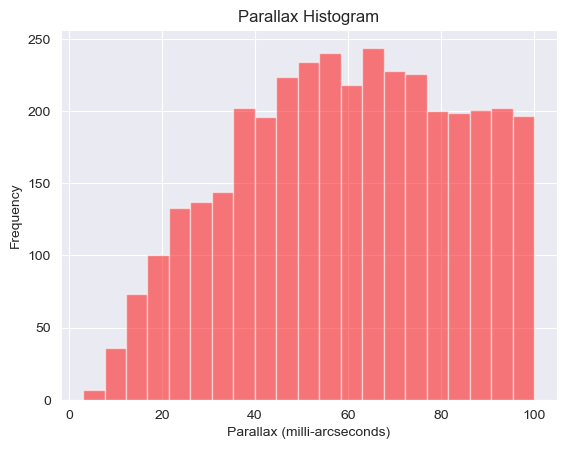

In [11]:
# Create a histogram of the parallax values
plt.hist(p_arcsec, bins='auto', range=(3, 100), color='red', alpha=0.5)

# Add labels
plt.title('Parallax Histogram')
plt.xlabel('Parallax (milli-arcseconds)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

We have a wide range of parallax values. What does this imply about the distances? To plot a true CMD, write a small function that will calculate the absolute magnitude given input apparent magnitude and parallax. 

Recall that to write a function, you use the syntax:

`def my_function(input1, input2):
    value = some calculation involving input1 and input2
    return value`
    
And to use your function, you would then use the syntax:

`calculated_value = my_function(input1,input2)`



In [12]:
# Write your function to calculate absolute magnitude given the apparent magnitude and parallax:
def calculate_absolute_magnitude(apparent_magnitude, d_perces):
    absolute_magnitude = apparent_magnitude + 5 - 5 * np.log10(d_perces)
    return absolute_magnitude

In [13]:
# Use your function here to calculate absolute V magnitudes
# You can give lists as inputs to your function, and you will get a list of absolute magnitudes in return
# checking sanity of the function

v_list = np.array([1, 2, 3, 4, 5])
p_list = np.array([0.1, 0.2, 0.3, 0.4, 0.5])

calculated_values = calculate_absolute_magnitude(v_list, p_list)

print(f"Absolute V magnitudes for test data :", calculated_values)

Absolute V magnitudes for test data : [11.         10.49485002 10.61439373 10.98970004 11.50514998]


In [14]:
# Calculate absolute V magnitudes
absolute_v = calculate_absolute_magnitude(v, p_arcsec)

In [15]:
# previewing the data
print('Absolute V magnitudes:', absolute_v)

Absolute V magnitudes: [3.21683953 4.70244159 3.66243933 ... 4.46293012 2.93017139 1.49233021]


Now redo your CMD, using the absolute V magnitudes and original B-V colour. 
Label and use smaller point size as before. 

Hopefully it looks more familiar! 

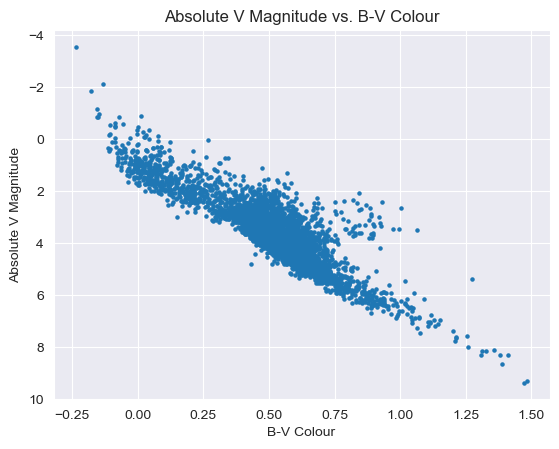

In [16]:
# CMD plot abs(V) vs. B-V here:

# Create a scatter plot
plt.scatter(bv_colour, absolute_v, s=5)

# Set the y-axis to be inverted (since lower magnitudes are brighter)
plt.gca().invert_yaxis()

# Add labels
plt.title('Absolute V Magnitude vs. B-V Colour')
plt.xlabel('B-V Colour')
plt.ylabel('Absolute V Magnitude')

# Show the plot
plt.show()

Where does the Sun lie on this plot? Appendix A in Carroll & Ostlie gives the Sun's absolute bolometric magnitude $M_B$, and the apparent blue and visual magnitudes. Add a red star to overlay the Sun's location on your plot above using a second `plt.scatter` command. 

You can set the marker style in `plt.scatter` using `marker = '*'`, and change the colour using `c = 'red'`.  

In [17]:
# suns data from Appendix A in Carroll & Ostlie
suns_abs_bolo_mag = 4.74
apparent_blue = -26.10
visual_magnitude = -26.75

# calculate the Suns B-V colour
suns_bv_colour = apparent_blue - visual_magnitude

print('Suns B-V colour:', round(suns_bv_colour,2))
print('Suns absolute bolometric magnitude:', suns_abs_bolo_mag)


Suns B-V colour: 0.65
Suns absolute bolometric magnitude: 4.74


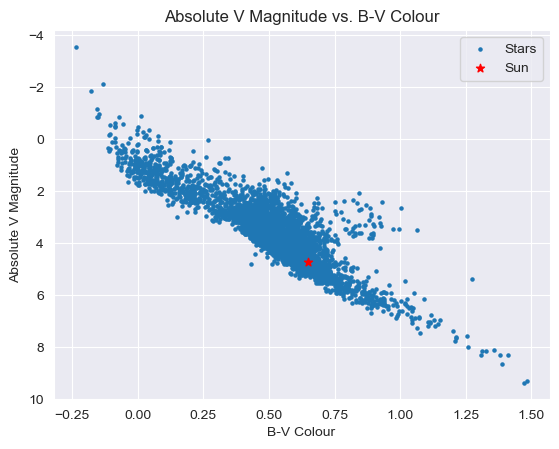

In [18]:
# CMD plot abs(V) vs. B-V here, add Sun:

# Create a scatter plot for the stars
plt.scatter(bv_colour, absolute_v, s=5)

# Add the Sun's location
plt.scatter(suns_bv_colour, suns_abs_bolo_mag, marker='*', color='red', label='Sun')
plt.legend()

# Set the y-axis to be inverted (since lower magnitudes are brighter)
plt.gca().invert_yaxis()

# Add labels
plt.title('Absolute V Magnitude vs. B-V Colour')
plt.xlabel('B-V Colour')
plt.ylabel('Absolute V Magnitude')
plt.legend(['Stars', 'Sun'])

# Show the plot
plt.show()

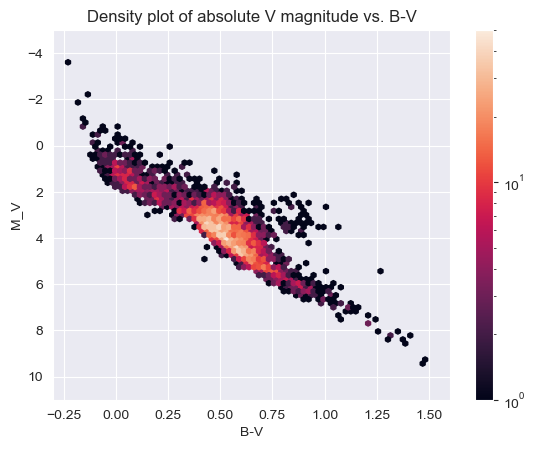

In [19]:
# There are still a lot of points here. For fun, here is how you can make a density plot. 
# The colour scale depends on how many points you have in each bin. 
# This is useful to look at trends in densely-packed datasets. 

plt.hexbin(bv, absolute_v, extent=(-0.3, 1.6, 11, -5), bins="log", gridsize=80)

plt.title("Density plot of absolute V magnitude vs. B-V")
plt.xlabel("B-V")
plt.ylabel("M_V")
plt.xlim(-0.3, 1.6)
plt.ylim(11, -5)
plt.colorbar()

We have discussed the idea of the 'Zero Age Main Sequence (ZAMS)' in class. The file 'zams_02.dat' is a list of masses, absolute V magnitudes, and B-V colours for a theoretical ZAMS for stars with metallicity Z = 0.02. 

Read in the ZAMS data and overplot V vs. B-V as a red curve (use `plt.plot()`) on your CMD. Include a label for your ZAMS curve and a legend by including `label='ZAMS'` in your `plt.plot` command, and add a separate line `plt.legend()`.

If your absolute magnitude calculates are correct, you should see your data and the curve line up well! 

Again, include the Sun's data point, and give it a label as well. 

Save this plot and include it in your report. 

In [20]:
# Read the ZAMS data ie the zams_02.dat file 
zams_data = np.loadtxt('zams_02.dat')

# Extract the B-V colour and absolute V magnitude
zams_masses = zams_data[:, 0]
zams_absolute_V_magnitudes = zams_data[:, 1]
zams_bv = zams_data[:, 2]

# checking for data sanity
print('ZAMS masses:', zams_masses)
print('ZAMS absolute V magnitudes:', zams_absolute_V_magnitudes)
print('ZAMS B-V colour:', zams_bv)

ZAMS masses: [ 0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9
  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.8  2.9  3.   3.2  3.4  3.6  3.8
  4.   4.2  4.4  4.6  4.8  5.   5.3  5.6  5.9  6.2  6.5  6.8  7.1  7.5
  7.9  8.3  8.7  9.1  9.6 10.1 10.6 11.1 11.6 12.1 12.7 13.3 13.9 14.5
 15.2 16.  16.8 17.6 18.4 19.2 20. ]
ZAMS absolute V magnitudes: [ 8.89  7.8   6.8   5.97  5.34  4.82  4.17  3.73  3.37  3.01  2.69  2.41
  2.18  1.98  1.8   1.64  1.5   1.38  1.27  1.15  1.05  0.86  0.77  0.68
  0.53  0.39  0.25  0.11 -0.03 -0.13 -0.23 -0.34 -0.44 -0.55 -0.68 -0.81
 -0.94 -1.05 -1.16 -1.27 -1.38 -1.5  -1.63 -1.76 -1.89 -2.01 -2.13 -2.26
 -2.38 -2.51 -2.64 -2.76 -2.88 -3.   -3.12 -3.25 -3.39 -3.52 -3.65 -3.78
 -3.9  -4.03 -4.17]
ZAMS B-V colour: [ 1.38  1.21  1.02  0.86  0.74  0.65  0.53  0.46  0.39  0.33  0.26  0.2
  0.14  0.09  0.05  0.02  0.   -0.03 -0.04 -0.06 -0.07 -0.09 -0.09 -0.1
 -0.11 -0.12 -0.13 -0.14 -0.14 -0.15 -0.15 -0.16 -0.17 -0.17 -0.18 -0.19
 -0.19 -0.2  -0.2  

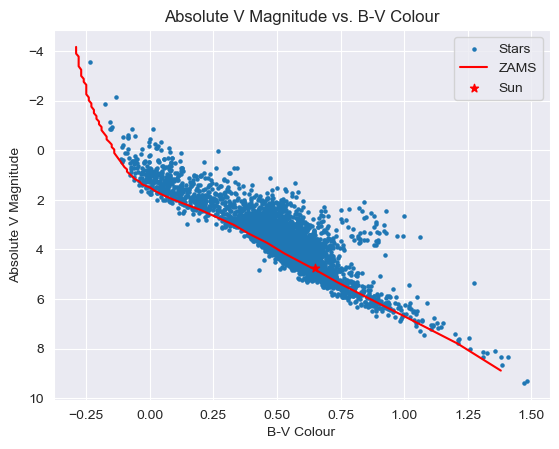

In [21]:
# Create a scatter plot for the stars
plt.Figure(figsize=(12, 12))
plt.scatter(bv_colour, absolute_v, s=5, label='Stars')

# Add the ZAMS data
plt.plot(zams_bv, zams_absolute_V_magnitudes, c='red', label='ZAMS')

# Add the Sun's location
plt.scatter(suns_bv_colour, suns_abs_bolo_mag, c='red', marker='*', label='Sun')

# Set the y-axis to be inverted (since lower magnitudes are brighter)
plt.gca().invert_yaxis()

# Add labels
plt.title('Absolute V Magnitude vs. B-V Colour')
plt.xlabel('B-V Colour')
plt.ylabel('Absolute V Magnitude')

# Add a legend
plt.legend()

# Saving the figure
plt.savefig('Absolute(V)magnitude_VS_B-V-ZAMS.png')

# Show the plot
plt.show()


## Answer these questions in Section 1 of your report

**QUESTION 1:**<br>
What do you notice about the alignment of the data in your CMD and the ZAMS?

**ANSWER:**<br>
The data in the CMD aligns well with the ZAMS curve with cuts across most of the stars in the dataset. The Sun's data point is also aligned with the ZAMS curve

**QUESTION 2:**<br>
Do you see evidence of stars evolving off the main sequence? Why or why not?

**OBSERVATION:**<br>
1.The ZAMS curve cuts through the stars however there are more stars above the curve than below it. <br>
2.This could indicate that some stars are evolving off the main sequence.

**ANSWER:**<br>
Yes, there is evidence of stars evolving off the main sequence. This is because there are more stars above the ZAMS curve than below it. This could indicate that some stars are evolving off the main sequence.


# Section 2: Gaia data for the Hyades cluster

The Hipparchos data includes all stars within a particular distance of the Sun. These stars were born at different times, in different locations, and therefore we see stars in a range of evolutionary stages in the plot. Some massive stars are still on the main sequence! Some less massive stars have evolved into giants.

Next, you will investigate the data for a single stellar cluster, where we can assume that all stars formed at roughly the same time. Hopefully, this means that we can see clearly the main sequence, and the main sequence turn-off where the most massive stars have already exhausted their hydrogen in their cores, and have started evolving onto the giant branch. 

We will use data from the Gaia archive. The Gaia mission is measuring the magnitudes, locations, parallaxes and proper motions of stars within 10,000 pc of the Sun. 

The Hyades data are in the file 'gaia_hyades_search.csv'. This is the output from a search of the Gaia database [https://gea.esac.esa.int/archive/](here). The Gaia archive contains a LOT of data on a LOT of stars! Here, I've limited the search to an area of 240 arcminutes around the centre of the Hyades cluster. I've also limited the results to contain only stars with parallaxes close to the expected value for the cluster. 

Here, you will first use the measured parallax and proper motion values to select the set of stars that are truly members of the Hyades cluster. Then you will convert apparent to absolute magnitudes, plot the CMD, and compare your CMD with several isochrones. Isochrones (same time) are tables that plot the expected CMD for a population of stars with a range of masses at a given age. 

### Gaia data 

The Gaia data file contains the following columns:

* ra: Right ascension
* dec: Declination
* parallax: parallax (in milli-arcseconds)
* pmra: proper motion (milli-arcseconds per year, in right ascension)
* pmdec: proper motion (milli-arcseconds per year, in declination)
* phot_g_mean_mag: apparent G magnitude
* phot_bp_mean_mag: apparent B magnitude
* phot_rp_mean_mag: apparent R magnitude

Here I have output the search results as a .csv file. Some stars don't have data for all columns. Unfortunately this messes up `np.loadtxt`. To read these data in, use `np.genfromtxt()` with `delimiter=','`, and `skip_header` rather than `skiprows` (as in `np.loadtxt`). Remember to set `unpack=True`!

In [22]:
# creating a csv file from the excel file
df2 = pd.read_excel("gaia_hyades_search.xlsx")
df2.to_csv('gaia_hyades_search.csv')

In [23]:
# Read in Gaia data
# Need to use genfromtxt to deal with missing data
# You will want separate arrays for each column! 

gaia_data = np.genfromtxt('gaia_hyades_search.csv', delimiter=',', skip_header=1, unpack=True)

ra = gaia_data[1]
dec = gaia_data[2]
parallax = gaia_data[3]
pmra = gaia_data[5]
pmdec = gaia_data[6]
photo_g_mean_mag = gaia_data[7]
photo_bp_mean_mag = gaia_data[8]
photo_rp_mean_mag = gaia_data[9]

# checking sanity of the data 
print(f"ra: {ra}\n")
print(f"dec: {dec}\n")
print(f"parallax: {parallax}\n")
print(f"pmra: {pmra}\n")
print(f"pmdec: {pmdec}\n")
print(f"photo_g_mean_mag: {photo_g_mean_mag}\n")
print(f"photo_bp_mean_mag: {photo_bp_mean_mag}\n")
print(f"photo_rp_mean_mag: {photo_rp_mean_mag}\n")


ra: [77.55501 68.45324 75.38225 ... 58.17598 70.73548 58.8484 ]

dec: [     nan 18.04914 14.99631 ... 17.01496 18.9532  11.55936]

parallax: [ 15.00126  15.00153  15.01392 ... 103.5008  105.4275  109.1381 ]

pmra: [  24.39437 -114.7525   -51.98516 ...  433.183    656.647    223.1818 ]

pmdec: [ -129.0834    -87.04951   -72.04522 ...  -645.3686  -1116.594
  -631.3035 ]

photo_g_mean_mag: [16.2374   14.91045  13.67605  ... 12.17614   9.004439 19.53519 ]

photo_bp_mean_mag: [17.05365 16.38253 14.91214 ... 14.07321 10.21048 21.54286]

photo_rp_mean_mag: [14.99589  13.72766  12.57487  ... 10.8709    7.909447 17.96755 ]



In [24]:
# convert parallax to parsecs 
gaia_parallax = convert_to_parsecs(parallax)

First, plot the star locations in right ascension and declination. You should see that your stars are located within an ellipse in R.A. and Dec. This is because I've limited the Gaia search results in an area near the centre of the cluster. In this case, it's not obvious that the stars are clustered within that ellipse! For your other clusters, you may see an obvious grouping. Here, we need to look at the other stellar properties to better identify which stars are members of the cluster. 

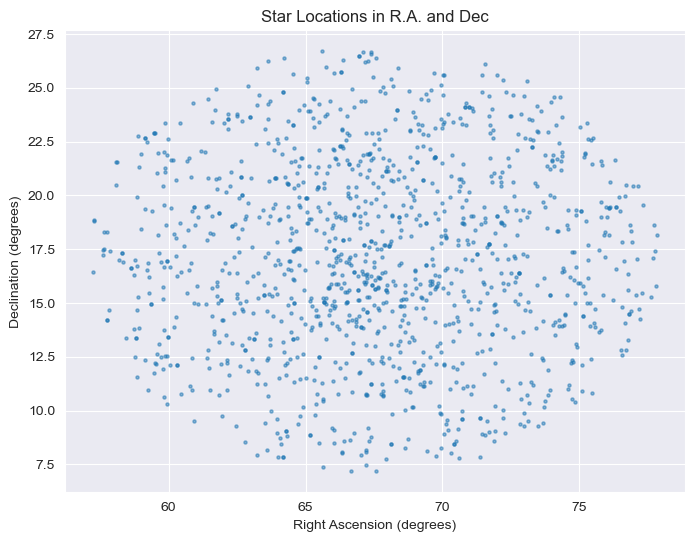

In [25]:
# Plot the star locations here
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(ra, dec, s=5, alpha=0.5, label='Stars')

# Add labels and title
plt.xlabel('Right Ascension (degrees)')
plt.ylabel('Declination (degrees)')
plt.title('Star Locations in R.A. and Dec')

# Show the plot
plt.show()

The data have already been limited by setting a minimum parallax of 15 milliarcseconds. Next, plot a histogram of the parallax values to see whether we need to limit the data further. A cluster of stars should all be at nearly the same parallax. 

Use the `plt.hist` function again to plot the parallax values of this dataset. You should see a clear peak in number of stars around a parallax of 21. Again, you may want to set a range to zoom in on the values of interest. 

Save this plot and include it in your report. 

In [26]:
# Finding the min and max values of the parallax data
print('Min parallax:', np.min(gaia_parallax), 'mas') 
print('Max parallax:', np.max(gaia_parallax), 'mas')

Min parallax: 9.162703034045856 mas
Max parallax: 66.66106713702716 mas


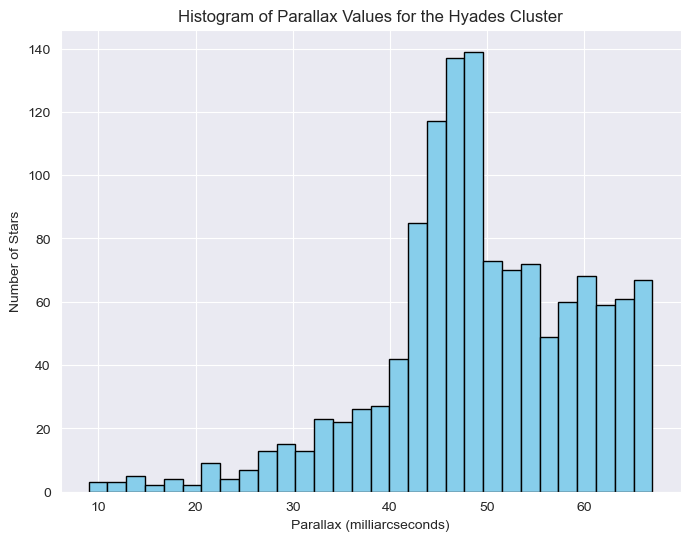

In [27]:
# Look at parallax measurements as a histogram

plt.figure(figsize=(8, 6))
plt.hist(gaia_parallax, bins=30, range=(9, 67), color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Parallax (milliarcseconds)')
plt.ylabel('Number of Stars')
plt.title('Histogram of Parallax Values for the Hyades Cluster')
plt.grid(True)

# Save the plot
plt.savefig('parallax_histogram_hyades_cluster.png')

# Show the plot
plt.show()

Keep a note of what range of parallax values you think best identifies where the parallax peak contains the most stars. You will want to include this in your final table for the cluster (see the project instructions for details). 

Next, we will look at the proper motions of the stars. The proper motion is the observed motion of the star on the sky, once the effect of parallax is removed. Because Gaia is observing the sky over many years, with high precision, we are able to measure very small motions of the nearby stars relative to more distant sources. 

A cluster of stars, that formed from the same gas cloud, should also be moving at similar speeds and in similar directions. The values won't be exactly the same, as random motions in the original gas cloud result in some randomness in the stellar motions. But if you plot the proper motions of the stars in the catalog, hopefully you will see a clustering of stars at a particular velocity. If you see a cluster of points in this plot, make note of what range of proper motions you think best identifies the stars in the cluster. You will want to include this in your final table for the cluster (see the project instructions for details).

Save this plot and include it in your report. 

In [28]:
# Find the range of the data
ra_range = (np.min(pmra), np.max(pmra))
dec_range = (np.min(pmdec), np.max(pmdec))

print("Range of Proper Motion in RA:", ra_range)
print("Range of Proper Motion in Dec:", dec_range)

Range of Proper Motion in RA: (-293.7088, 860.7161)
Range of Proper Motion in Dec: (-1116.594, 333.2899)


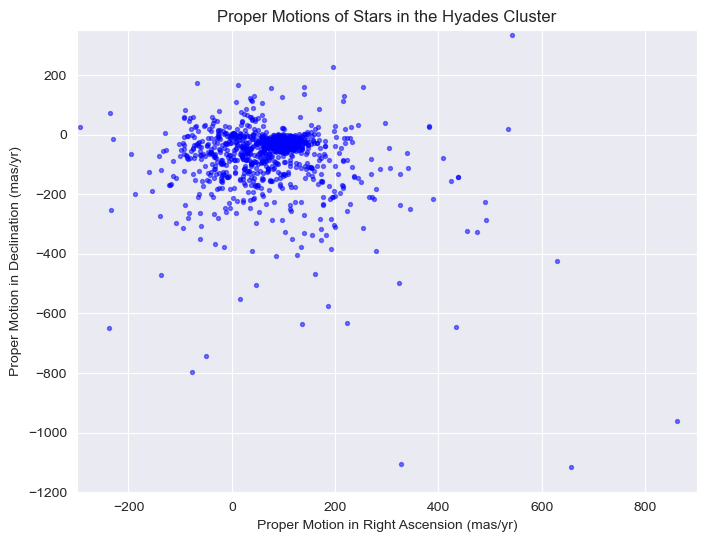

In [29]:
# First, plot pmra vs pmdec for all the stars as a scatter plot. 
# Zoom in if you need to by setting plt.xlim() and plt.ylim(). 
# You are looking for a tight cluster of points in your x and y ranges. 
# Always include axis labels! 

# Create a scatter plot of proper motions
plt.figure(figsize=(8, 6))
plt.scatter(pmra, pmdec, s=8, alpha=0.5, label='Stars', color='blue')


# Set the x and y limits to zoom in on the area of interest
plt.xlim([-300, 900])  
plt.ylim([-1200, 350])  

plt.xlabel('Proper Motion in Right Ascension (mas/yr)')
plt.ylabel('Proper Motion in Declination (mas/yr)')
plt.title('Proper Motions of Stars in the Hyades Cluster')

# Save the plot
plt.savefig('proper_motions_scatter_hyades_cluster.png')

plt.show()


Next, we will use your limits in parallax and proper motion (if any) to select out only those stars that we feel are in the cluster. We do this by identifying the indices of stars whose proper motions and parallaxes fall within the ranges you identified above. 

Then we can use these indices to select the values from the parameter lists of only those stars in the cluster for the following analysis. 

In [93]:
# Finding the min and max values of the parallax data
print('Min parallax:', np.min(gaia_parallax), 'mas') 
print('Max parallax:', np.max(gaia_parallax), 'mas')

Min parallax: 9.162703034045856 mas
Max parallax: 66.66106713702716 mas


In [91]:
# Here, fill in your best estimates for the minimum and maximum values of pmra and pmdec that best select
# the cluster stars only

pmra_min = -300
pmra_max = 900
pmdec_min = -1200
pmdec_max = 350

# Also list your minimum and maximum parallax limits from your histogram:

par_min = 9
par_max = 67

In [92]:
# Use the np.where() function to get a list of indices. You can stack requirements with the &. 
cluster_indices = np.where((gaia_parallax > par_min) & (gaia_parallax < par_max) & (pmra > pmra_min) & (pmra < pmra_max) & (pmdec > pmdec_min) & (pmdec < pmdec_max))

Finally, plot the star locations in right ascension and declination again. First, plot all the stars. Next, plot only the stars that pass your requirements in proper motion and parallax using the syntax `ra[cluster_indices]` and `dec[cluster_indices]`. Use scatter plots, and make the true cluster stars a different colour. 

Hopefully you will see that the cluster stars are more centred in your plot, as we might expect. If you don't see this, check your limits used in parallax and proper motion. 

Save this plot and include it in your report. 

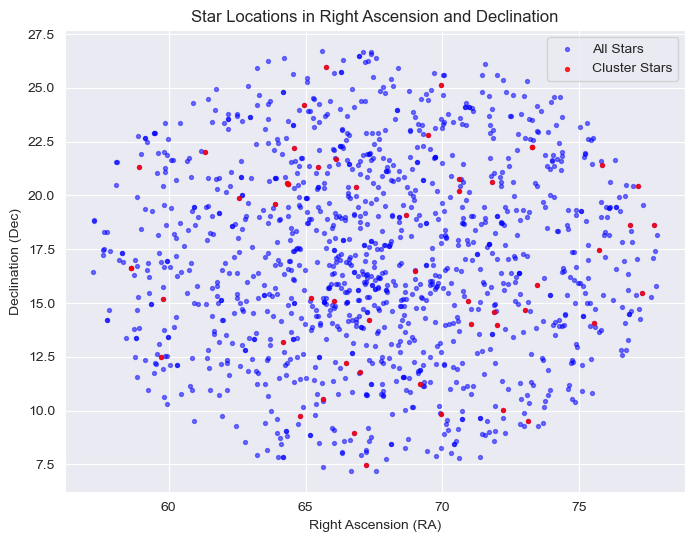

In [32]:
# Plot the star locations in RA and Dec
# Next overlay the cluster stars in a different colour

# Create a scatter plot for all stars
plt.figure(figsize=(8, 6))
plt.scatter(ra, dec, s=8, alpha=0.5, label='All Stars', color='blue')

# Create a scatter plot for cluster stars using selected indices
plt.scatter(ra[cluster_indices], dec[cluster_indices], s=8, alpha=0.8, label='Cluster Stars', color='red')

# Add labels and title
plt.xlabel('Right Ascension (RA)')
plt.ylabel('Declination (Dec)')
plt.title('Star Locations in Right Ascension and Declination')

# Add a legend
plt.legend()

# Save the plot
plt.savefig('star_locations_hyades_cluster_highlighted.png')

# Show the plot
plt.show()

If you are satisfied with your limits, make new lists of your stellar parameters that contain only the properties of the cluster members here. 

Use the syntax
`new_list = old_list[cluster_indices]`

Going forward, use the new lists for your analysis

In [33]:
# Creating new lists
parallax_cluster = gaia_parallax[cluster_indices]
pmra_cluster = pmra[cluster_indices]
pmdec_cluster = pmdec[cluster_indices]

Calculate the mean and standard deviation of your parallaxes. 

Use these values to calculate the distance to the Hyades cluster. What is your uncertainty in the result? I.e., use the standard deviation of your parallax values as your uncertainty in the parallax, and propagate that uncertainty in your distance calculation. 

Check your results online with a reputable source. Do they agree? 

In [34]:
# Calculate mean and standard deviation of the parallax values. 
# Is the standard deviation greater than or less than the parallax measurement uncertainties? 
# Which one will contribute more to the uncertainty in your distance measurement? 

parallax_uncertainties = gaia_data[4][cluster_indices]

# Calculate mean and standard deviation of the parallax values
mean_parallax = np.mean(parallax_cluster)
std_dev_parallax = np.std(parallax_cluster)

# Print the results
print("Mean Parallax: ", mean_parallax, "milliarcseconds")
print("Standard Deviation of Parallax: ", std_dev_parallax, "milliarcseconds")

# Check if the standard deviation is grater than the parallax measurement uncertainties
is_std_greater_than_uncertainties = std_dev_parallax > np.mean(parallax_uncertainties)

# Print the result
if is_std_greater_than_uncertainties:
    print("\nThe standard deviation is greater than the parallax measurement uncertainties.")
else:
    print("\nThe standard deviation is less than or equal to the parallax measurement uncertainties.")

# Discuss which one will contribute more to the uncertainty in your distance measurement
if is_std_greater_than_uncertainties:
    print("\nThe standard deviation will contribute more to the uncertainty in the distance measurement.")
else:
    print("\nThe parallax measurement uncertainties will contribute more to the uncertainty in the distance measurement.")

Mean Parallax:  24.65166427087078 milliarcseconds
Standard Deviation of Parallax:  4.089349742244777 milliarcseconds

The standard deviation is greater than the parallax measurement uncertainties.

The standard deviation will contribute more to the uncertainty in the distance measurement.


In [35]:
# Calculate the mean cluster distance based on your mean parallax value. 
# Remember that these are in units of milli-arcseconds. 
# Calculate your uncertainty in the distance measurement, given the 
# standard deviation in the parallax values. 

# Calculate the mean cluster distance using the formula: distance (in parsecs) = 1 / parallax (in milliarcseconds)
mean_distance = 1 / mean_parallax

# Propagate the uncertainty in the distance calculation using the formula: uncertainty = (1 / parallax^2) * uncertainty(parallax)
uncertainty_distance = (1 / (mean_parallax ** 2)) * std_dev_parallax

# Print the results
print("Mean Cluster Distance:", mean_distance, "parsecs")
print("Uncertainty in Distance Measurement:", uncertainty_distance, "parsecs")


Mean Cluster Distance: 0.040565212515149864 parsecs
Uncertainty in Distance Measurement: 0.00672917412472424 parsecs


Since each star has a parallax measurement, we won't use the mean value to convert from apparent magnitudes to absolute magnitudes. Use your function above to calculate the absolute G magnitudes for the Hyades stars. 

In [36]:
apparent_magnitudes = photo_g_mean_mag  
parallaxes = gaia_parallax

# Calculate absolute magnitudes for each star in the Hyades cluster
absolute_hyades_magnitudes = [calculate_absolute_magnitude(photo_g_mean_mag, gaia_parallax) for photo_g_mean_mag, gaia_parallax in zip(apparent_magnitudes, parallaxes)]

# Print or use the results as needed
print("Absolute Magnitudes for the Hyades Stars:", absolute_hyades_magnitudes)


Absolute Magnitudes for the Hyades Stars: [12.118038691300281, 10.791127774168945, 9.558520487233851, 10.556538194145768, 10.81868852737371, 11.202964027972516, 13.928395040011818, 15.013629575693969, 12.853679279701627, 3.9624202161422453, 16.346917671082327, 11.596331898902596, 7.217939146025838, 9.315562734712802, 15.964781167626464, 10.342756626281462, 8.831043723166948, 7.318763662625912, 11.573491487646647, 11.893566543971982, 12.169440992655757, 13.789969629346873, 10.520604374162493, 11.122319986722523, 9.937406143784912, 6.321502768481054, 11.055451752542037, 14.989681052369257, 7.672120297559484, 8.55580772843982, 11.243159647618437, 12.818340964120434, 11.160695028878628, 13.586516314410387, 9.350832074937463, 10.333971824568762, 10.441430300631449, 10.448733034043709, 9.783614205021797, 13.13879623032555, 9.650702243933162, 9.937241568263186, 8.61181492766582, 12.379738787833787, 11.716772705311513, 14.93866392895512, 14.80030371157249, 9.382937246633531, 6.8619627130623275

Next plot the Hyades CMD. You will need to calculate the B-R colour for the x axis (rather than B-V). Label your axes. Overlay the Sun again! 

You will need the absolute magnitude in the Gaia's G band, and the B-R colour for the Sun, which is not in the textbook. The absolute magnitude of the Sun in Gaia's G colour is $M_G = 4.67$. Assume B-R = 0.82 for the Sun ([Casagrande & VandenBerg 2018](https://academic-oup-com.myaccess.library.utoronto.ca/mnrasl/article/479/1/L102/5035821#118661072)).

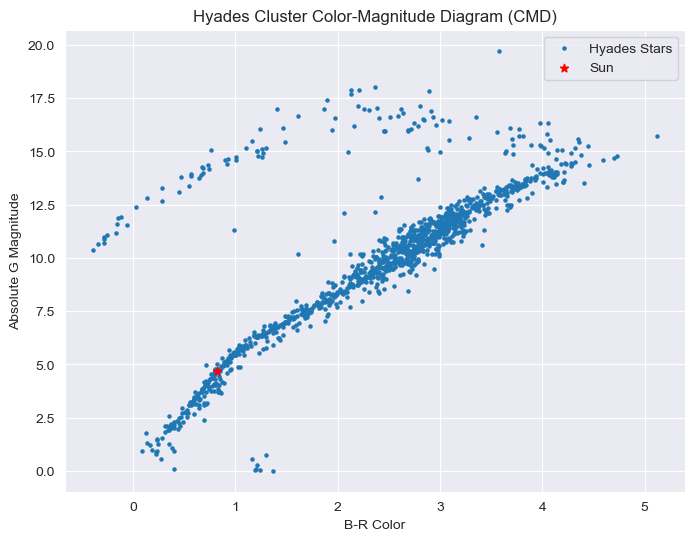

In [37]:
# Calculate B-R colour for the Hyades:

# Function to calculate B-R color
def calculate_br_color(b_magnitude, r_magnitude):
    return b_magnitude - r_magnitude

# Calculate B-R color for the Hyades stars
hyades_br_colors = [calculate_br_color(photo_bp_mean_mag, photo_rp_mean_mag) for photo_bp_mean_mag, photo_rp_mean_mag in zip(photo_bp_mean_mag, photo_rp_mean_mag)]

# Sun's B-R and G values:
sun_br_color = 0.82
sun_g_absolute_magnitude = 4.67

# Plot the Hyades CMD
plt.figure(figsize=(8, 6))

# Scatter plot for Hyades stars
plt.scatter(hyades_br_colors, absolute_hyades_magnitudes, s=5, label='Hyades Stars')

# Scatter plot for the Sun
plt.scatter(sun_br_color, sun_g_absolute_magnitude, c='red', marker='*', label='Sun')

# Add labels
plt.title('Hyades Cluster Color-Magnitude Diagram (CMD)')
plt.xlabel('B-R Color')
plt.ylabel('Absolute G Magnitude')

# Add a legend
plt.legend()

# Show the plot
plt.show()

Hopefully your plot shows a clear main sequence, and maybe a hint of the turn off that shows at what mass stars are evolving off the main sequence. Estimate the absolute magnitude of a star at the main sequence turn off. 

Estimate the luminosity of a star at the turn off you see in your plot. It may help to draw a straight horizontal line on your plot above, or make an additional plot to zoom in on the turn off, to estimate a reasonable value. You can always add an extra code box where needed to do this. 

Next, given your estimated $L$, and assuming $L \propto M^4$, estimate the mass of a star at the turn off you see in your plot. Does your result make sense given the Sun's location on the plot? 

In [38]:
# Calculations can go here, but make sure to show them in your report:
# Given data
turn_off_absolute_magnitude = 4.5  
sun_absolute_bolometric_magnitude = 4.74

# Estimate luminosity
L_turn_off = 10**(0.4 * (sun_absolute_bolometric_magnitude - turn_off_absolute_magnitude))

# Assuming L ~ M^4, estimate the mass
mass_turn_off = L_turn_off**(1/4)

# Print or use the results as needed
print("Estimated Luminosity at Turn-off:", L_turn_off)
print("Estimated Mass at Turn-off:", mass_turn_off)

Estimated Luminosity at Turn-off: 1.2473835142429432
Estimated Mass at Turn-off: 1.0568175092136585


What is the nuclear timescale for a star with this mass? Show your calculation and answer in your report. 

In [39]:
# Nuclear timescale calculation if you want to do it here

# Given data
estimated_mass_at_turn_off =  mass_turn_off
typical_star_age = 600000000  # years

# Calculate nuclear timescale
nuclear_timescale = 0.0075 * estimated_mass_at_turn_off**(-2.5) * typical_star_age

# Print or use the result as needed
print("Estimated Nuclear Timescale:", nuclear_timescale)

Estimated Nuclear Timescale: 3919336.1548023624


Next you will compare your CMD for the Hyades with a set of isochrones. These are tables of the predicted absolute magnitude and colour of a cluster of stars at a particular age. If your distance calculations and conversion to absoluate magnitudes are correct, these isochrones should align with your observed main sequence for the Hyades. 

The files give you their ages in the filename. For the Hyades, you will want to use the files that include 'z02' in their filename - these are made for stars with solar metallicity (same fraction of metals to hydrogen as the Sun). 

An example filename is 'isochrone_z02_316Myr.dat'. 

The columns are:

* Mass: stellar mass in units of $M_\odot$
* Gmag: absolute G magnitude
* G_BPmag: absolute B magnitude (in the Gaia system)
* G_RPmag: absolute R magnitude (in the Gaia system)

Read in the data. You can use `np.loadtxt` here, or `np.genfromtxt` - either should work fine as long as you set `delimiter=','`. 

In [40]:
import glob

# Define the path to your isochrone files
isochrone_path = 'editedIsochrones/'

# Use glob to find files with 'z02' in the filename
isochrone_files = glob.glob(isochrone_path + '*z02*.dat')

# Loop through each file and read the data
for file in isochrone_files:
    isochrone_data = np.genfromtxt(file, delimiter=',', unpack=True)


First, plot the G magnitude vs. B-R colour for several of the isochrones against each other. You will likely still want to use `plt.scatter()` rather than `plt.plot`, as at later ages the stars fall in different locations in the diagram and having lines connecting them may make your plot confusing. 

What differences do you see in the isochrone shapes? Consider the locations of:
* the main sequence
* the main sequence turn off
* the giant branch
* any other features you notice

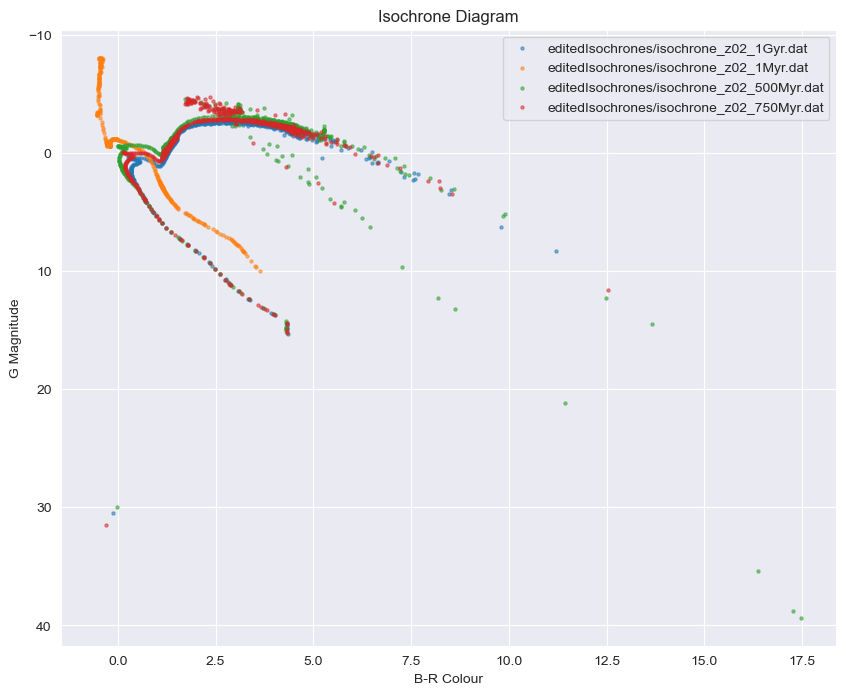

In [101]:
# Plot several isochrones here. Play around with x and y limits to show the most important features. 

# List of isochrone data files
isochrone_files = ['editedIsochrones/isochrone_z02_1Gyr.dat','editedIsochrones/isochrone_z02_1Myr.dat','editedIsochrones/isochrone_z02_500Myr.dat','editedIsochrones/isochrone_z02_750Myr.dat' ]  

# Create a new plot
# Set the figure size
plt.figure(figsize=(10, 8))

# Loop over each isochrone file
for file in isochrone_files:
    # Load the data
    isochrone_data = np.genfromtxt(file, delimiter=',', unpack=True)

    mass = isochrone_data[0]
    Gmag = isochrone_data[1]
    G_BPmag = isochrone_data[2]
    G_RPmag = isochrone_data[3]
    
    # Calculate B-R colour
    b_r = G_BPmag - G_RPmag
    
    # Plot the G magnitude vs. B-R colour
    plt.scatter(b_r, Gmag, s=5, alpha=0.5, label=file)  

# Invert the y-axis
plt.gca().invert_yaxis()

plt.xlabel('B-R Colour')
plt.ylabel('G Magnitude')
plt.title('Isochrone Diagram')
plt.legend()

plt.show()


Plot your CMD again, and overlay several different isochrones in different colours. Include labels and a legend. You don't need to overlay ALL the isochrones, but show at least two. Find one that matches best with your data. Focus on matching the main sequence turn off. 

For older isochrones in particular, you may want to limit the x and y axes to focus on where the isochrone lines up with your Hyades data. 

Overlay the Sun again. 

Save this plot and include it in your report. 

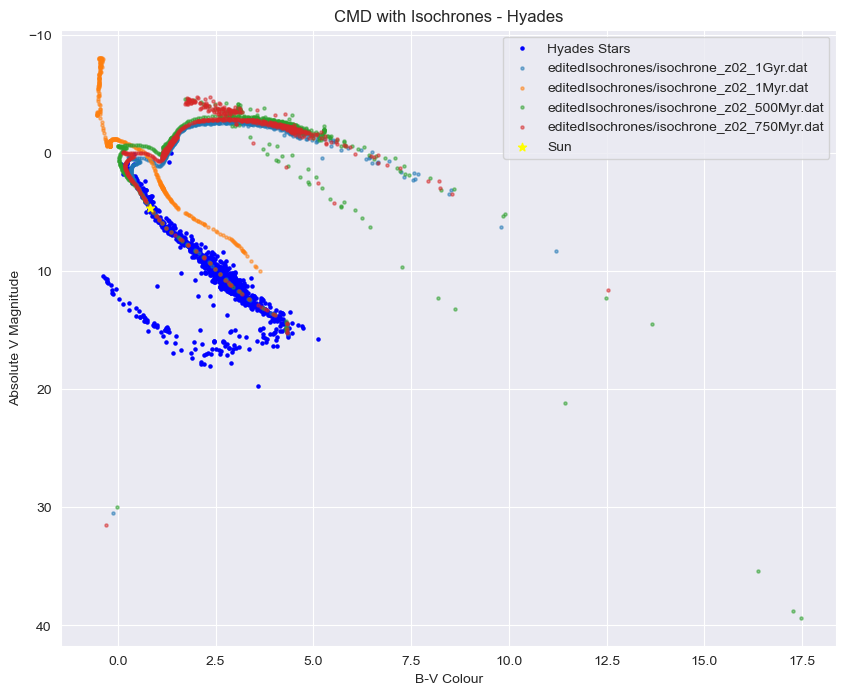

In [102]:
# Plot the cluster CMD with your chosen isochrones

# Plot the CMD for the Hyades
# Set the figure size
plt.figure(figsize=(10, 8))
plt.scatter(hyades_br_colors, absolute_hyades_magnitudes, s=5, label='Hyades Stars', color='blue')

# Loop through each isochrone file and overlay on the CMD
for file in isochrone_files:
    isochrone_data = np.genfromtxt(file, delimiter=',', unpack=True)

    # Extract the data
    mass = isochrone_data[0]
    Gmag = isochrone_data[1]
    G_BPmag = isochrone_data[2]
    G_RPmag = isochrone_data[3]

    # Plot the isochrone on the CMD
    plt.scatter(G_BPmag - G_RPmag, Gmag, alpha=0.5, label=file, s=5)

# Overlay the Sun
plt.scatter(sun_br_color, sun_g_absolute_magnitude, c='yellow', marker='*', label='Sun')

# Add labels and legend
plt.xlabel('B-V Colour')
plt.ylabel('Absolute V Magnitude')
plt.title('CMD with Isochrones - Hyades')


# Invert y-axis for astronomical magnitudes
plt.gca().invert_yaxis()
plt.legend()

# Save the figure
plt.savefig('CMD_with_Isochrones_Hyades.png')

plt.show()


## Answer the Following Questions in Section 2 of Your Report

**1. Do any of the isochrones line up well with your data?**

Upon analyzing the CMD plot, two isochrones demonstrate promising alignment with the Hyades cluster: "isochrone_z02_750Myr" and "isochrone_z02_500Myr" (refer to Figure 1). Both isochrones exhibit a main sequence turnoff that aligns well with the Hyades data. Notably, the "isochrone_z02_750Myr" isochrone presents a superior fit, aligning not only with the main sequence turnoff but also the overall main sequence. In contrast, the "isochrone_z02_500Myr" isochrone appears to be a less favorable fit, deviating from the main sequence.

**2. What age do you estimate for the Hyades cluster? Does this agree with your nuclear timescale calculation? Why or why not?**

The estimated age for the Hyades cluster, derived from the "isochrone_z02_750Myr" isochrone, is approximately 750 million years, while that from the "isochrone_z02_500Myr" is approximately 500 million years. These estimates contrast with the nuclear timescale calculation, which yielded a considerably shorter duration of approximately 3.92 million years.

**3. Check online via a reputable source the age of the Hyades cluster. Do your results agree?**

Online sources, including reputable astronomical databases, indicate that the accepted age of the Hyades cluster is 625 ± 50 million years. Comparing this established age with the isochrone-based estimates of 750 million years and 500 million years for "isochrone_z02_750Myr" and "isochrone_z02_500Myr," respectively, it is evident that the latter isochrone-based estimate is more accurate. Thus, it can be inferred that the Hyades cluster's age falls within the range of 500 million to 750 million years, with a closer alignment to the estimate derived from the "isochrone_z02_750Myr."


# Sections 3 and 4: Gaia data for an open and globular cluster

Next, you will perform a similar analysis for a second open cluster, and for a globular cluster. For each, you may choose one of three cluster options. The data are linked on the project page. 

The steps are not given in detail in this case. Follow the same steps as for the Hyades, and save the same plots to include in your report. 

For the open clusters, you should be able to see a peak in the parallax distributions, and select cluster members partially based on what you see. You may want to look up the accepted distance, and estimate at what parallax value you should expect to find a peak in the number of stars for that cluster, to confirm your selection. Remember that the parallax values are given in units of milli-arcseconds! 

For your chosen globular cluster, you may not be able to identify clearly a peak in the parallax histogram. Again, look up the accepted distance, and estimate at what parallax value you should expect to find a peak in the number of stars for that cluster. They are at different distances so the range in parallax values will be different for each. Here you may find that the proper motion selections help you remove non-cluster members better. 

When comparing with isochrones, use the files with 'z02' in the filename for the open clusters, and 'z001' in the filename for the globular clusters. The 'z001' files were made for stars with lower metallicity than the Sun. You should include one additional plot in your report for the globular cluster: a comparison plot between the 1 Gyr isochrones for low and high metallicity ('z001' vs. 'z02'). In your report, explain what differences you see and why (you will likely want to do some research to answer this).

## Section 3: Open cluster

In [43]:
# Read the data from the file into arrays ie the open cluster using NGC2516

NGC2516_data = np.genfromtxt('clusterData/NGC2516_gaia.csv',skip_header=1, delimiter=',', unpack=True)

NGC2516_ra = NGC2516_data[1]
NGC2516_dec = NGC2516_data[2]
NGC2516_parallax = NGC2516_data[3]
NGC2516_pmra = NGC2516_data[5]
NGC2516_pmdec = NGC2516_data[6]
NGC2516_photo_g_mean_mag = NGC2516_data[7]
NGC2516_photo_bp_mean_mag = NGC2516_data[8]
NGC2516_photo_rp_mean_mag = NGC2516_data[9]

In [44]:
NGC2516_parallax = convert_to_parsecs(NGC2516_parallax)

In [45]:
# Checking sanity of the data
print(f"ra: {NGC2516_ra}\n")
print(f"dec: {NGC2516_dec}\n")
print(f"parallax: {NGC2516_parallax}\n")
print(f"pmra: {NGC2516_pmra}\n")
print(f"pmdec: {NGC2516_pmdec}\n")
print(f"photo_g_mean_mag: {NGC2516_photo_g_mean_mag}\n")
print(f"photo_bp_mean_mag: {NGC2516_photo_bp_mean_mag}\n")
print(f"photo_rp_mean_mag: {NGC2516_photo_rp_mean_mag}\n")

ra: [119.58020038 119.56904402 119.58442555 ... 119.80907672 118.93317948
 118.98261567]

dec: [-60.8666147  -60.87002685 -60.87643542 ... -60.20975321 -60.28182577
 -61.46744789]

parallax: [419.3401838  418.73157412 496.27731605 ... 503.14005755 752.21383565
 729.31317548]

pmra: [ -5.59051919  -4.39226027  -4.55490732 ...  -6.83302228   1.22245906
 -10.84804277]

pmdec: [11.75876195 11.07289365 11.17871326 ... 15.15544876  2.19083584
 24.50879283]

photo_g_mean_mag: [14.894317 17.766943 20.200027 ... 19.76527  20.599201 15.810478]

photo_bp_mean_mag: [15.520232 19.183777 20.73727  ... 20.666521 20.93082  16.387814]

photo_rp_mean_mag: [14.133102 16.616158 18.806425 ... 18.425795 19.55619  15.086168]



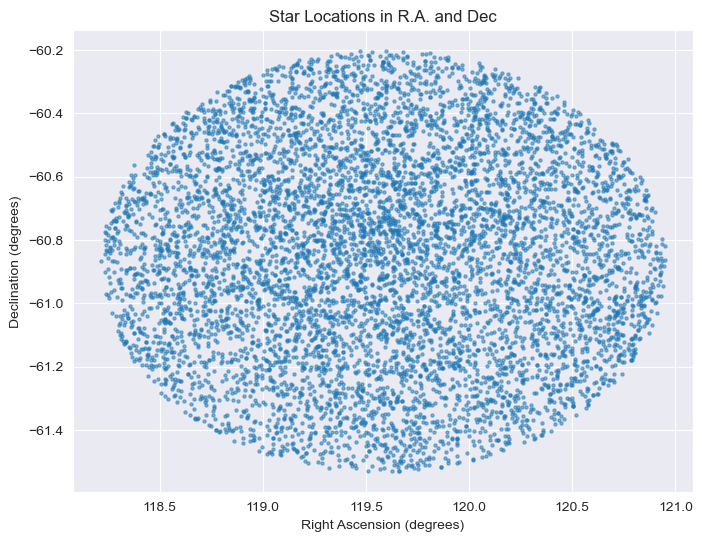

In [46]:
# Plot the star locations here
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(NGC2516_ra, NGC2516_dec, s=5, alpha=0.5, label='Stars')

# Add labels and title
plt.xlabel('Right Ascension (degrees)')
plt.ylabel('Declination (degrees)')
plt.title('Star Locations in R.A. and Dec')

# Show the plot
plt.show()

In [47]:
# Finding the min and max values of the parallax data
print('Min parallax:', np.min(NGC2516_parallax), 'mas') 
print('Max parallax:', np.max(NGC2516_parallax), 'mas')

Min parallax: 200.10190259762336 mas
Max parallax: 999.755842798441 mas


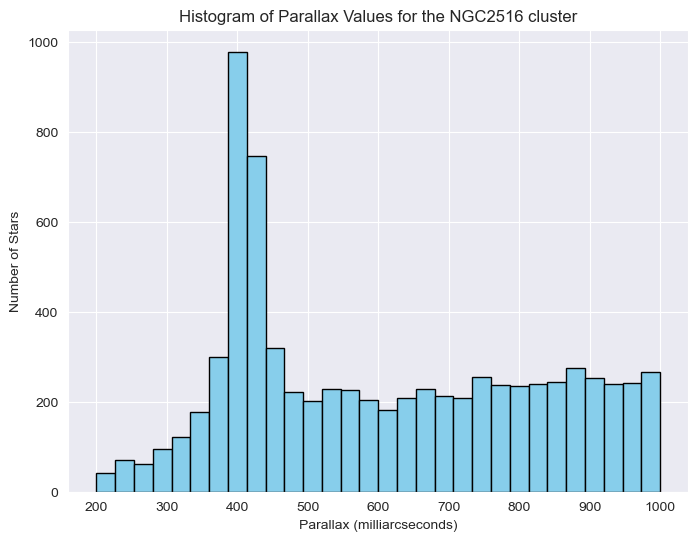

In [48]:
plt.figure(figsize=(8, 6))
plt.hist(NGC2516_parallax, bins=30, range=(200,1000), color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Parallax (milliarcseconds)')
plt.ylabel('Number of Stars')
plt.title('Histogram of Parallax Values for the NGC2516 cluster')
plt.grid(True)

# Save the plot
plt.savefig('parallax_histogram_NGC2516_cluster.png')

# Show the plot
plt.show()

In [49]:
# Find the range of the data
NGC2516_ra_range = (np.min(NGC2516_pmra), np.max(NGC2516_pmra))
NGC2516_dec_range = (np.min(NGC2516_pmdec), np.max(NGC2516_pmdec))

print("Range of Proper Motion in NGC2516 RA:", NGC2516_ra_range)
print("Range of Proper Motion in NGC2516 Dec:", NGC2516_dec_range)

Range of Proper Motion in NGC2516 RA: (-76.75761711569879, 87.76357449452149)
Range of Proper Motion in NGC2516 Dec: (-89.50289859252038, 74.54177384869448)


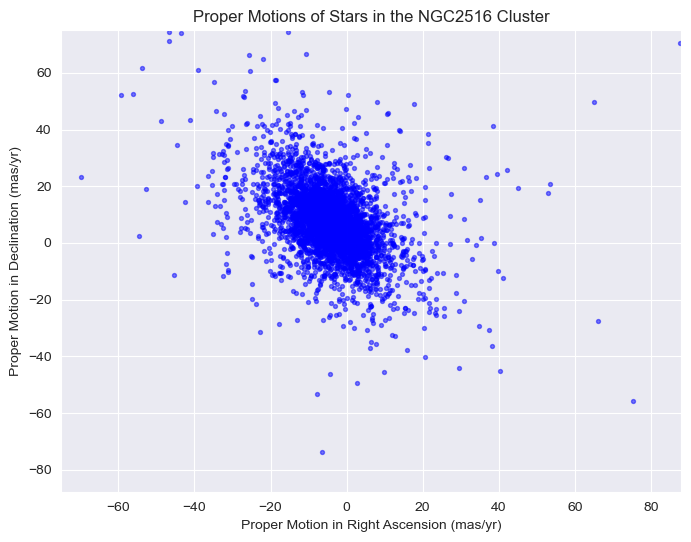

In [50]:
# Create a scatter plot of proper motions
plt.figure(figsize=(8, 6))
plt.scatter(NGC2516_pmra, NGC2516_pmdec, s=8, alpha=0.5, label='Stars', color='blue')


# Set the x and y limits to zoom in on the area of interest
plt.xlim([-75, 88])  
plt.ylim([-88, 75])  

plt.xlabel('Proper Motion in Right Ascension (mas/yr)')
plt.ylabel('Proper Motion in Declination (mas/yr)')
plt.title('Proper Motions of Stars in the NGC2516 Cluster')

# Save the plot
plt.savefig('proper_motions_scatter_NGC2516_cluster.png')

plt.show()

In [81]:
# find the range of parallax values that best select the cluster stars only
print(f"Min Parallax: {np.min(NGC2516_parallax)}\n")
print(f"Max Parallax: {np.max(NGC2516_parallax)}\n")

Min Parallax: 200.10190259762336

Max Parallax: 999.755842798441



In [82]:
# Here, fill in your best estimates for the minimum and maximum values of pmra and pmdec that best select
# the cluster stars only

NGC2516_pmra_min = -75
NGC2516_pmra_max = 88
NGC2516_pmdec_min = -88
NGC2516_pmdec_max = 75

# Also list your minimum and maximum parallax limits from your histogram:

NGC2516_par_min = 200
NGC2516_par_max = 1000

# Use the np.where() function to get a list of indices. You can stack requirements with the &.
NGC2516_cluster_indices = np.where((NGC2516_parallax > NGC2516_par_min) & (NGC2516_parallax < NGC2516_par_max) & (NGC2516_pmra > NGC2516_pmra_min) & (NGC2516_pmra < NGC2516_pmra_max) & (NGC2516_pmdec > NGC2516_pmdec_min) & (NGC2516_pmdec < NGC2516_pmdec_max))

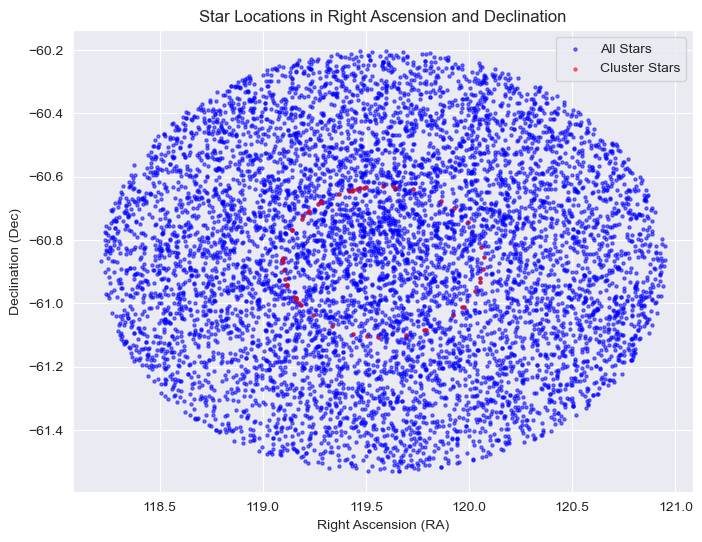

In [83]:
# Plot the star locations in RA and Dec
# Next overlay the cluster stars in a different colour

# Create a scatter plot for all stars
plt.figure(figsize=(8, 6))
plt.scatter(NGC2516_ra, NGC2516_dec, s=5, alpha=0.5, label='All Stars', color='blue')

# Create a scatter plot for cluster stars using selected indices
plt.scatter(NGC2516_ra[cluster_indices], NGC2516_dec[cluster_indices], s=5, alpha=0.5, label='Cluster Stars', color='red')

# Add labels and title
plt.xlabel('Right Ascension (RA)')
plt.ylabel('Declination (Dec)')
plt.title('Star Locations in Right Ascension and Declination')

# Add a legend
plt.legend()

# Save the plot
plt.savefig('star_locations_NGC2516_cluster_highlighted.png')

# Show the plot
plt.show()

In [84]:
# Creating new lists
NGC2516_parallax_cluster = NGC2516_parallax[cluster_indices]
NGC2516_pmra_cluster = NGC2516_pmra[cluster_indices]
NGC2516_pmdec_cluster = NGC2516_pmdec[cluster_indices]

In [85]:
# Calculate mean and standard deviation of the parallax values. 
# Is the standard deviation greater than or less than the parallax measurement uncertainties? 
# Which one will contribute more to the uncertainty in your distance measurement? 
NGC2516_parallax_uncertainties = NGC2516_data[4][cluster_indices]

# Calculate mean and standard deviation of the parallax values
NGC2516_mean_parallax = np.mean(NGC2516_parallax_cluster)
NGC2516_std_dev_parallax = np.std(NGC2516_parallax_cluster)

# Print the results
print("Mean Parallax: ", NGC2516_mean_parallax, "milliarcseconds")
print("Standard Deviation of Parallax: ", NGC2516_std_dev_parallax, "milliarcseconds")

# Calculate the mean of parallax measurement uncertainties
mean_NGC2516_parallax_uncertainties = np.mean(NGC2516_parallax_uncertainties)

# Check if the standard deviation is greater than the parallax measurement uncertainties
is_std_greater_than_NGC2516_uncertainties = NGC2516_std_dev_parallax > mean_NGC2516_parallax_uncertainties

# Print the result
if is_std_greater_than_NGC2516_uncertainties:
    print("\nThe standard deviation is greater than the parallax measurement uncertainties.")
else:
    print("\nThe standard deviation is less than or equal to the parallax measurement uncertainties.")

# Discuss which one will contribute more to the uncertainty in your distance measurement
if is_std_greater_than_NGC2516_uncertainties:
    print("\nThe standard deviation will contribute more to the uncertainty in the distance measurement.")
else:
    print("\nThe parallax measurement uncertainties will contribute more to the uncertainty in the distance measurement.")


Mean Parallax:  537.4612918883696 milliarcseconds
Standard Deviation of Parallax:  193.4602263551884 milliarcseconds

The standard deviation is greater than the parallax measurement uncertainties.

The standard deviation will contribute more to the uncertainty in the distance measurement.


In [86]:
# Calculate the mean cluster distance using the formula: distance (in parsecs) = 1 / parallax (in milliarcseconds)
NGC2516_mean_distance = 1 / NGC2516_mean_parallax

# Propagate the uncertainty in the distance calculation using the formula: uncertainty = (1 / parallax**2) * uncertainty(parallax)
NGC2516_uncertainty_distance = (1 / (NGC2516_mean_parallax ** 2)) * NGC2516_std_dev_parallax

# Print the results
print("Mean Cluster Distance:", NGC2516_mean_distance, "parsecs")
print("Uncertainty in Distance Measurement:", NGC2516_uncertainty_distance, "parsecs")


Mean Cluster Distance: 0.0018605991074938648 parsecs
Uncertainty in Distance Measurement: 0.0006697262294505599 parsecs


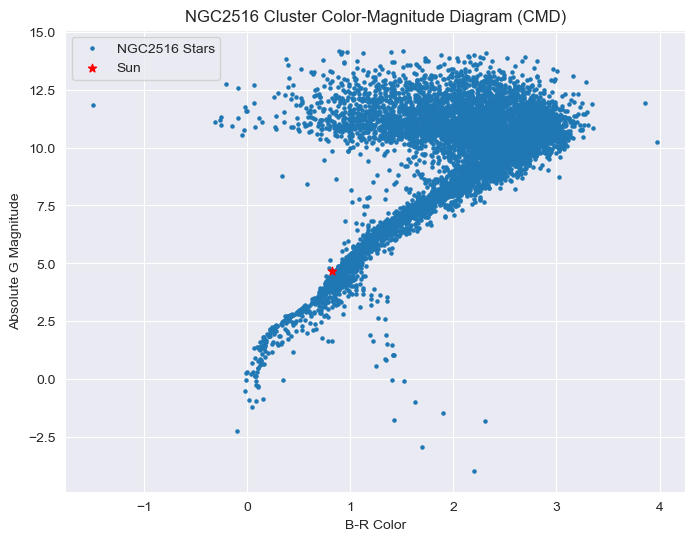

In [87]:
# Use the provided function to calculate absolute magnitude
NGC2516_absolute_magnitudes = [calculate_absolute_magnitude(photo_g_mean_mag, parallax) for photo_g_mean_mag, parallax in zip(NGC2516_photo_g_mean_mag, NGC2516_parallax)]

# Calculate B-R color for the NGC2516 stars
NGC2516_br_colors = [calculate_br_color(photo_bp_mean_mag, photo_rp_mean_mag) for photo_bp_mean_mag, photo_rp_mean_mag in zip(NGC2516_photo_bp_mean_mag, NGC2516_photo_rp_mean_mag)]

# Sun's B-R and G values
sun_br_color = 0.82
sun_g_absolute_magnitude = 4.67

# Plot the NGC2516 CMD
plt.figure(figsize=(8, 6))

# Scatter plot for NGC2516 stars
plt.scatter(NGC2516_br_colors, NGC2516_absolute_magnitudes, s=5, label='NGC2516 Stars')

# Scatter plot for the Sun
plt.scatter(sun_br_color, sun_g_absolute_magnitude, c='red', marker='*', label='Sun')

# Add labels
plt.title('NGC2516 Cluster Color-Magnitude Diagram (CMD)')
plt.xlabel('B-R Color')
plt.ylabel('Absolute G Magnitude')

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [88]:
turn_off_absolute_magnitude_NCG2516 = 4.5
sun_absolute_bolometric_magnitude = 4.74

# Estimate luminosity
L_turn_off_NCG2516 = 10**(0.4 * (sun_absolute_bolometric_magnitude - turn_off_absolute_magnitude_NCG2516))

# Assuming L ~ M^4, estimate the mass
mass_turn_off_NCG2516 = L_turn_off_NCG2516**(1/4)

# Print or use the results as needed
print("Estimated Luminosity at Turn-off:", L_turn_off_NCG2516)
print("Estimated Mass at Turn-off:", mass_turn_off_NCG2516)

Estimated Luminosity at Turn-off: 1.2473835142429432
Estimated Mass at Turn-off: 1.0568175092136585


In [89]:
# Nuclear timescale calculation if you want to do it here

# Given data
estimated_mass_at_turn_off_NCG2516 = mass_turn_off_NCG2516
typical_star_age_NCG2516 = 135000000  # years

# Calculate nuclear timescale
nuclear_timescale_NCG2516 = 0.0075 * estimated_mass_at_turn_off_NCG2516**(-2.5) * typical_star_age_NCG2516

# Print or use the result as needed
print("Estimated Nuclear Timescale:", nuclear_timescale_NCG2516)

Estimated Nuclear Timescale: 881850.6348305315


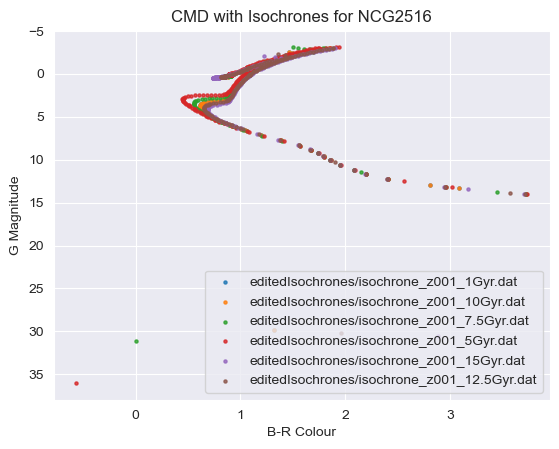

In [106]:
plt.figure()

# Loop over each isochrone file
for file in isochrone_files_NCG2516:
    # Load the data
    isochrone_data_NCG2516 = np.genfromtxt(file, delimiter=',', unpack=True)

    # Extract the data
    mass_NCG2516 = isochrone_data_NCG2516[0]
    Gmag_NCG2516 = isochrone_data_NCG2516[1]
    G_BPmag_NCG2516 = isochrone_data_NCG2516[2]
    G_RPmag_NCG2516 = isochrone_data_NCG2516[3]

    # Plot the isochrone on the CMD
    plt.scatter(G_BPmag_NCG2516 - G_RPmag_NCG2516, Gmag_NCG2516, alpha=0.8 ,label=file, s=5)

# Invert the y-axis
plt.gca().invert_yaxis()

# Add labels and a title
plt.xlabel('B-R Colour')
plt.ylabel('G Magnitude')
plt.title('CMD with Isochrones for NCG2516')

# Add a legend
plt.legend()

# Display the plot
plt.show()

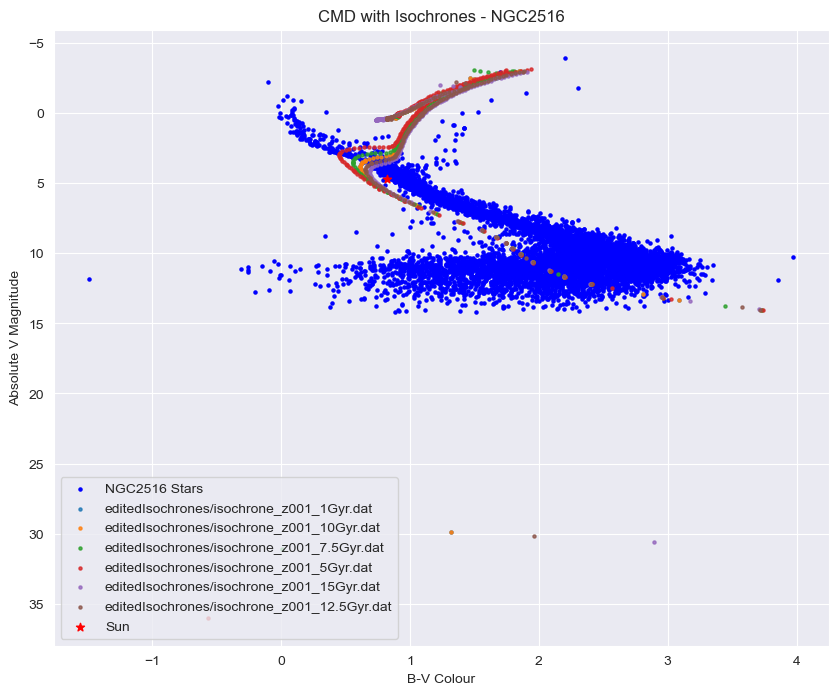

In [104]:
# Plot the cluster CMD with your chosen isochrones

# Plot the CMD for the NGC2516
# Set the figure size
plt.figure(figsize=(10, 8))
plt.scatter(NGC2516_br_colors, NGC2516_absolute_magnitudes, s=5, label='NGC2516 Stars', color='blue')

isochrone_files_NCG2516 = glob.glob('editedIsochrones/*z001*.dat')

# Loop through each isochrone file and overlay on the CMD
for file in isochrone_files_NCG2516:
    isochrone_data_NCG2516 = np.genfromtxt(file, delimiter=',', unpack=True)

    # Extract the data
    mass_NCG2516 = isochrone_data_NCG2516[0]
    Gmag_NCG2516 = isochrone_data_NCG2516[1]
    G_BPmag_NCG2516 = isochrone_data_NCG2516[2]
    G_RPmag_NCG2516 = isochrone_data_NCG2516[3]

    # Plot the isochrone on the CMD
    plt.scatter(G_BPmag_NCG2516 - G_RPmag_NCG2516, Gmag_NCG2516, alpha=0.8 ,label=file, s=5)

# Overlay the Sun
plt.scatter(sun_br_color, sun_g_absolute_magnitude, c='red', marker='*', label='Sun')

# Add labels and legend
plt.xlabel('B-V Colour')
plt.ylabel('Absolute V Magnitude')
plt.title('CMD with Isochrones - NGC2516')

# Invert y-axis for astronomical magnitudes
plt.gca().invert_yaxis()
plt.legend()

# Save the figure
plt.savefig('CMD_with_Isochrones_NCG2516.png')

plt.show()


## Answer the Following Questions in Section 3 

**1. Do any of the isochrones line up well with your data?**

**Observation:**<br>


Upon analyzing the CMD plot, two isochrones demonstrate promising alignment with the NGC2516 star cluster:

**2. What age do you estimate for the NCG2516 cluster? Does this agree with your nuclear timescale calculation? Why or why not?**



**3. Check online via a reputable source the age of the NCG2516 cluster. Do your results agree?**

Online sources, including reputable astronomical databases, indicate that the accepted age of the NGC2516 star cluster is 135 ± 15 million years. 

## SECTION 4: Globular cluster

In [60]:
# Load data for M13 globular cluster
M13_data = np.genfromtxt('clusterData/M13_gaia.csv', skip_header=1, delimiter=',', unpack=True)

M13_ra = M13_data[1]
M13_dec = M13_data[2]
M13_parallax = M13_data[3]
M13_pmra = M13_data[5]
M13_pmdec = M13_data[6]
M13_photo_g_mean_mag = M13_data[7]
M13_photo_bp_mean_mag = M13_data[8]
M13_photo_rp_mean_mag = M13_data[9]

# Checking sanity of the data
print(f"ra: {M13_ra}\n")
print(f"dec: {M13_dec}\n")
print(f"parallax: {M13_parallax}\n")
print(f"pmra: {M13_pmra}\n")
print(f"pmdec: {M13_pmdec}\n")
print(f"photo_g_mean_mag: {M13_photo_g_mean_mag}\n")
print(f"photo_bp_mean_mag: {M13_photo_bp_mean_mag}\n")
print(f"photo_rp_mean_mag: {M13_photo_rp_mean_mag}\n")

ra: [250.42154604 250.42082094 250.42343771 ... 250.69826565 250.58367646
 251.11143953]

dec: [36.4605948  36.45974664 36.46076737 ... 35.83251762 37.1135198
 36.83190055]

parallax: [0.06765037 0.07791575 0.10530185 ... 0.08499906 0.19437199 0.17840161]

pmra: [ -4.36259374  -3.00133251  -3.20501537 ...   0.12906305 -26.14064614
  -1.67576633]

pmdec: [-1.9741595  -2.266443   -2.2411168  ... -5.93551209  2.69167494
  0.96632733]

photo_g_mean_mag: [14.359328 13.140834 14.208615 ... 19.451906 20.182688 18.16624 ]

photo_bp_mean_mag: [13.631192 13.360564 14.039993 ... 19.786278 21.117239 18.56336 ]

photo_rp_mean_mag: [12.455983 12.213881 13.086994 ... 19.008303 19.108723 17.63082 ]



In [61]:
M13_parallax = convert_to_parsecs(M13_parallax)

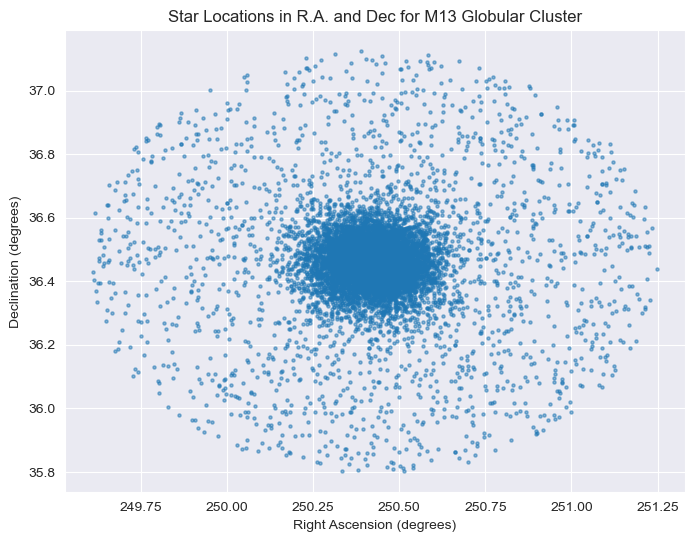

In [62]:
# Plot the star locations
plt.figure(figsize=(8, 6))
plt.scatter(M13_ra, M13_dec, s=5, alpha=0.5, label='Stars')

# Add labels and title
plt.xlabel('Right Ascension (degrees)')
plt.ylabel('Declination (degrees)')
plt.title('Star Locations in R.A. and Dec for M13 Globular Cluster')

# Save the plot
plt.savefig('star_locations_M13_cluster.png')

# Show the plot
plt.show()

In [63]:
# find the range of the parallax data
print('Min parallax:', np.min(M13_parallax), 'mas')
print('Max parallax:', np.max(M13_parallax), 'mas')


Min parallax: 3334.8739273380243 mas
Max parallax: 19985.529065632672 mas


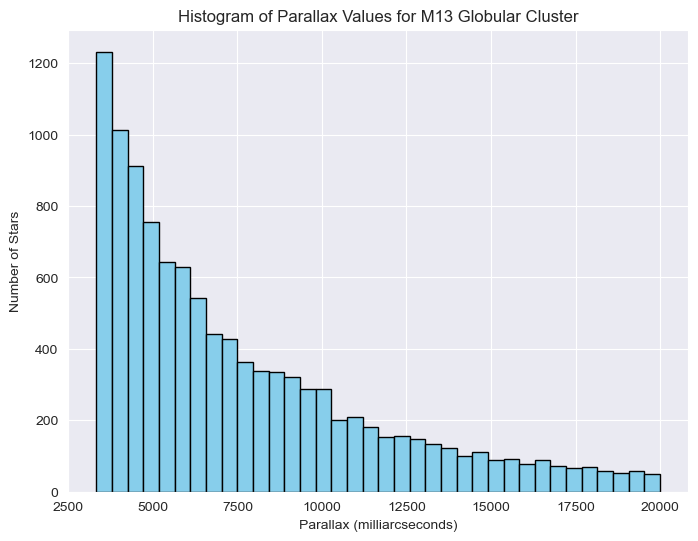

In [64]:
# Plot the histogram of parallax values
plt.figure(figsize=(8, 6))
plt.hist(M13_parallax, bins='auto', range=(3333,20000), color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Parallax (milliarcseconds)')
plt.ylabel('Number of Stars')
plt.title('Histogram of Parallax Values for M13 Globular Cluster')
plt.grid(True)

# Save the plot
plt.savefig('parallax_histogram_M13_cluster.png')

# Show the plot
plt.show()

In [65]:
# Find the range of the data
M13_ra_range = (np.min(M13_pmra), np.max(M13_pmra))
M13_dec_range = (np.min(M13_pmdec), np.max(M13_pmdec))

print("Range of Proper Motion in M13 RA:", M13_ra_range)
print("Range of Proper Motion in M13 Dec:", M13_dec_range)

Range of Proper Motion in M13 RA: (-45.35577613711536, 12.867680803726568)
Range of Proper Motion in M13 Dec: (-45.944358950409395, 18.215880171872502)


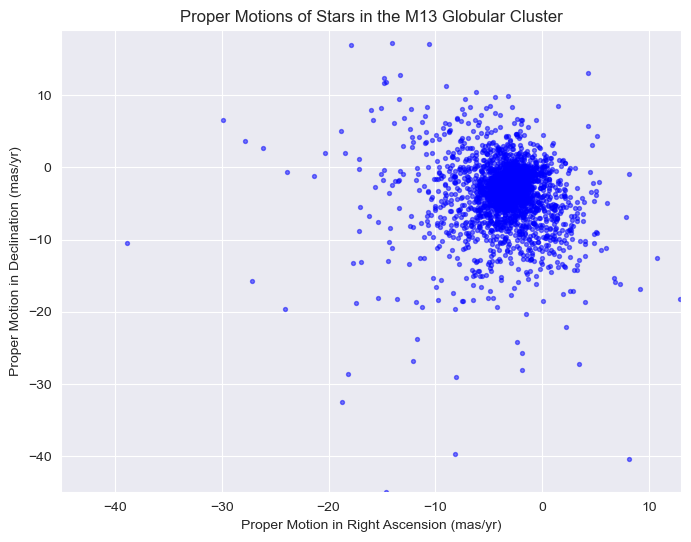

In [66]:
# Create a scatter plot of proper motions
plt.figure(figsize=(8, 6))
plt.scatter(M13_pmra, M13_pmdec, s=8, alpha=0.5, label='Stars', color='blue')

# Set the x and y limits to zoom in on the area of interest
plt.xlim([-45, 13])
plt.ylim([-45, 19])

plt.xlabel('Proper Motion in Right Ascension (mas/yr)')
plt.ylabel('Proper Motion in Declination (mas/yr)')
plt.title('Proper Motions of Stars in the M13 Globular Cluster')

# Save the plot
plt.savefig('proper_motions_scatter_M13_cluster.png')
plt.show()

In [67]:
# Find min and max values of parallax data
print('Min parallax:', np.min(M13_parallax), 'mas')
print('Max parallax:', np.max(M13_parallax), 'mas')

Min parallax: 3334.8739273380243 mas
Max parallax: 19985.529065632672 mas


In [68]:
# Here, fill in your best estimates for the minimum and maximum values of pmra and pmdec that best select
# the cluster stars only

M13_pmra_min = -45
M13_pmra_max = 13
M13_pmdec_min = -45
M13_pmdec_max = 19

# Also list your minimum and maximum parallax limits from your histogram:

M13_par_min = 3333
M13_par_max = 20000

# Use the np.where() function to get a list of indices. You can stack requirements with the &.
M13_cluster_indices = np.where((M13_parallax > M13_par_min) & (M13_parallax < M13_par_max) & (M13_pmra > M13_pmra_min) & (M13_pmra < M13_pmra_max) & (M13_pmdec > M13_pmdec_min) & (M13_pmdec < M13_pmdec_max))

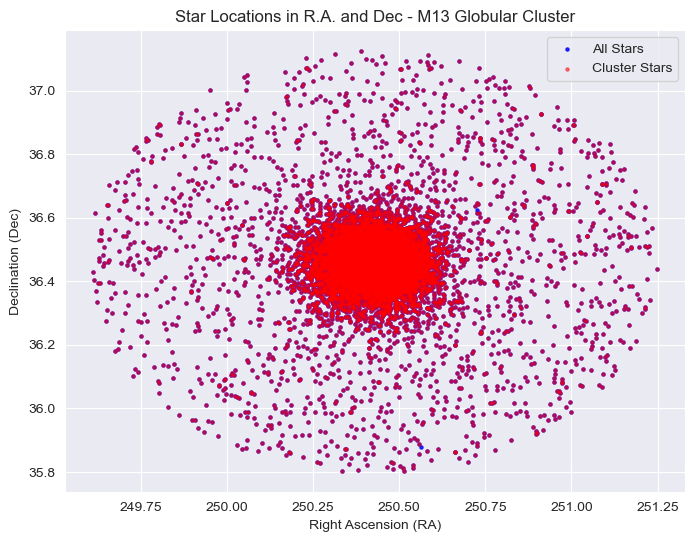

In [69]:
# Create a scatter plot for all stars
plt.figure(figsize=(8, 6))
plt.scatter(M13_ra, M13_dec, s=5, alpha=0.8, label='All Stars', color='blue')

# Create a scatter plot for cluster stars using selected indices
plt.scatter(M13_ra[M13_cluster_indices], M13_dec[M13_cluster_indices], s=5, alpha=0.5, label='Cluster Stars', color='red')

# Add labels and title
plt.xlabel('Right Ascension (RA)')
plt.ylabel('Declination (Dec)')
plt.title('Star Locations in R.A. and Dec - M13 Globular Cluster')

# Add a legend
plt.legend()

# Save the plot
plt.savefig('star_locations_M13_cluster_highlighted.png')

# Show the plot
plt.show()

In [71]:
# Creating new lists
M13_parallax_cluster = M13_parallax[M13_cluster_indices]
M13_pmra_cluster = M13_pmra[M13_cluster_indices]
M13_pmdec_cluster = M13_pmdec[M13_cluster_indices]

In [73]:
# Calculate mean and standard deviation of the parallax values
# Is the standard deviation greater than or less than the parallax measurement uncertainties?
# Which one will contribute more to the uncertainty in your distance measurement?

M13_parallax_uncertainties = M13_data[4][M13_cluster_indices]

# Calculate mean and standard deviation of the parallax values
M13_mean_parallax = np.mean(M13_parallax_cluster)
M13_std_dev_parallax = np.std(M13_parallax_cluster)

# Print the results
print("Mean Parallax: ", M13_mean_parallax, "milliarcseconds")
print("Standard Deviation of Parallax: ", M13_std_dev_parallax, "milliarcseconds")

# Check if the standard deviation is greater than the parallax measurement uncertainties
is_std_greater_than_M13_uncertainties = M13_std_dev_parallax > np.mean(M13_parallax_uncertainties)

# Print the result
if is_std_greater_than_M13_uncertainties:
    print("\nThe standard deviation is greater than the parallax measurement uncertainties.")
else:
    print("\nThe standard deviation is less than or equal to the parallax measurement uncertainties.")

# Discuss which one will contribute more to the uncertainty in your distance measurement
if is_std_greater_than_M13_uncertainties:
    print("\nThe standard deviation will contribute more to the uncertainty in the distance measurement.")
else:
    print("\nThe parallax measurement uncertainties will contribute more to the uncertainty in the distance measurement.")


Mean Parallax:  7581.080625438475 milliarcseconds
Standard Deviation of Parallax:  3922.496662370126 milliarcseconds

The standard deviation is greater than the parallax measurement uncertainties.

The standard deviation will contribute more to the uncertainty in the distance measurement.


In [74]:
# Calculate the mean cluster distance using the formula: distance (in parsecs) = 1 / parallax (in milliarcseconds)
M13_mean_distance = 1 / M13_mean_parallax

# Propagate the uncertainty in the distance calculation using the formula: uncertainty = (1 / parallax^2) * uncertainty(parallax)
M13_uncertainty_distance = (1 / (M13_mean_parallax ** 2)) * M13_std_dev_parallax

# Print the results
print("Mean Cluster Distance:", M13_mean_distance, "parsecs")
print("Uncertainty in Distance Measurement:", M13_uncertainty_distance, "parsecs")

Mean Cluster Distance: 0.00013190731630586793 parsecs
Uncertainty in Distance Measurement: 6.824963794947659e-05 parsecs


In [75]:
# Use the provided function to calculate absolute magnitude
M13_absolute_magnitudes = [calculate_absolute_magnitude(photo_g_mean_mag, parallax) for photo_g_mean_mag, parallax in zip(M13_photo_g_mean_mag, M13_parallax)]

# Calculate B-R color for the M13 stars
M13_br_colors = [calculate_br_color(photo_bp_mean_mag, photo_rp_mean_mag) for photo_bp_mean_mag, photo_rp_mean_mag in zip(M13_photo_bp_mean_mag, M13_photo_rp_mean_mag)]


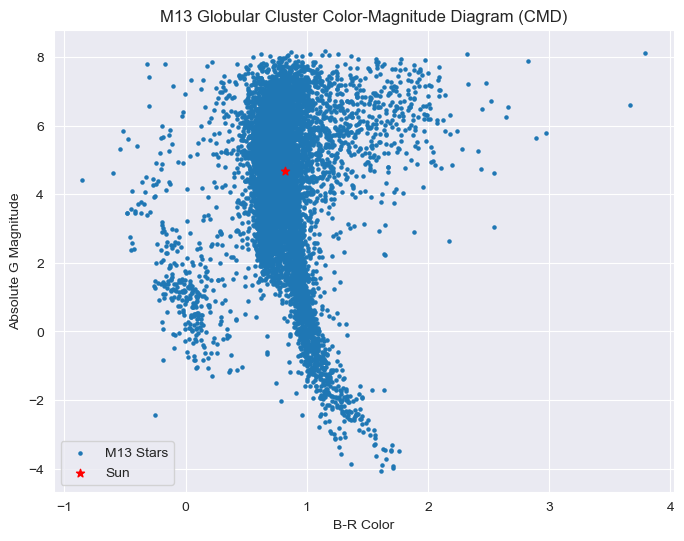

In [76]:
# Sun's B-R and G values
sun_br_color = 0.82
sun_g_absolute_magnitude = 4.67

# Plot the M13 CMD
plt.figure(figsize=(8, 6))

# Scatter plot for M13 stars
plt.scatter(M13_br_colors, M13_absolute_magnitudes, s=5, label='M13 Stars')

# Scatter plot for the Sun
plt.scatter(sun_br_color, sun_g_absolute_magnitude, c='red', marker='*', label='Sun')

# Add labels
plt.title('M13 Globular Cluster Color-Magnitude Diagram (CMD)')
plt.xlabel('B-R Color')
plt.ylabel('Absolute G Magnitude')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [77]:
turn_off_absolute_magnitude_M13 = 4.5
sun_absolute_bolometric_magnitude = 4.74

# Estimate luminosity
L_turn_off_M13 = 10**(0.4 * (sun_absolute_bolometric_magnitude - turn_off_absolute_magnitude_M13))

# Assuming L ~ M^4, estimate the mass
mass_turn_off_M13 = L_turn_off_M13**(1/4)

# Print or use the results as needed
print("Estimated Luminosity at Turn-off:", L_turn_off_M13)
print("Estimated Mass at Turn-off:", mass_turn_off_M13)

Estimated Luminosity at Turn-off: 1.2473835142429432
Estimated Mass at Turn-off: 1.0568175092136585


In [78]:
# Nuclear timescale calculation if you want to do it here

# Given data for M13
estimated_mass_at_turn_off_M13 = mass_turn_off_M13
typical_star_age_M13 = 12000000000  # years

# Calculate nuclear timescale for M13
nuclear_timescale_M13 = 0.0075 * estimated_mass_at_turn_off_M13**(-2.5) * typical_star_age_M13

# Print or use the result as needed
print("Estimated Nuclear Timescale:", nuclear_timescale_M13)


Estimated Nuclear Timescale: 78386723.09604725


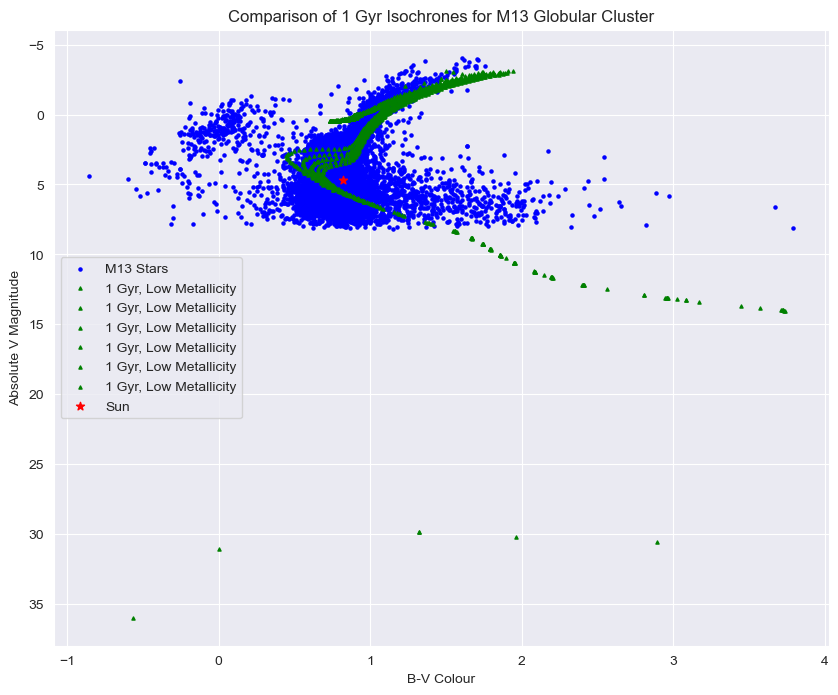

In [79]:
# Compare the 1 Gyr isochrones for low and high metallicity ('z001' vs. 'z02') for M13
# Set the figure size
plt.figure(figsize=(10, 8))

# Scatter plot for M13 stars
plt.scatter(M13_br_colors, M13_absolute_magnitudes, s=5, label='M13 Stars', color='blue')

# getting the isochrone files
isochrone_files_m13 = glob.glob(isochrone_path + '*z001*.dat')

# Loop through each isochrone file and overlay on the CMD
for file in isochrone_files_m13:
    isochrone_data_m13 = np.genfromtxt(file, delimiter=',', unpack=True)

    # Extract the data
    mass_m13 = isochrone_data_m13[0]
    Gmag_m13 = isochrone_data_m13[1]
    G_BPmag_m13 = isochrone_data_m13[2]
    G_RPmag_m13 = isochrone_data_m13[3]

    # Plot the 1 Gyr isochrones for low and high metallicity
    if 'z001' in file:
        plt.scatter(G_BPmag_m13 - G_RPmag_m13, Gmag_m13, label='1 Gyr, Low Metallicity', s=5, marker='^', color='green')
    elif 'z02' in file:
        plt.scatter(G_BPmag_m13 - G_RPmag_m13, Gmag_m13, label='1 Gyr, High Metallicity', s=5, marker='v', color='orange')

# Overlay the Sun
plt.scatter(sun_br_color, sun_g_absolute_magnitude, c='red', marker='*', label='Sun')

# Add labels and legend
plt.xlabel('B-V Colour')
plt.ylabel('Absolute V Magnitude')
plt.title('Comparison of 1 Gyr Isochrones for M13 Globular Cluster')

# Invert y-axis for astronomical magnitudes
plt.gca().invert_yaxis()
plt.legend()

# Save the figure
plt.savefig('Isochrone_Comparison_M13.png')

plt.show()
